In [57]:
import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline
idx = pd.IndexSlice

In [58]:
df = pd.read_csv('singapore-property-data.csv')
df.replace('-', pd.np.nan, inplace=True)
df.replace(',', '', regex=True, inplace=True)
df[df.columns[-9:]] = df[df.columns[-9:]].convert_objects(convert_numeric=True)
print df.columns
df[df.columns[-9:]].describe()

Index([u'year', u'month', u'Project Name', u'Street Name', u'Developer',
       u'Property Type', u'Locality', u'Total Number of Units in Project',
       u'Cumulative Units Launched to-date', u'Cumulative Units Sold to-date',
       u'Cumulative Units Launched but Unsold', u'Units Launched in the Month',
       u'Units Sold in the Month',
       u'Median Price($psm) # in the Month Number Sold By Price Range',
       u'Lowest Price ($psm) # in the Month',
       u'Highest Price ($psm) # in the Month'],
      dtype='object')


/home/arcolife/.local/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Total Number of Units in Project,Cumulative Units Launched to-date,Cumulative Units Sold to-date,Cumulative Units Launched but Unsold,Units Launched in the Month,Units Sold in the Month,Median Price($psm) # in the Month Number Sold By Price Range,Lowest Price ($psm) # in the Month,Highest Price ($psm) # in the Month
count,31683.000000,31683.000000,31683.000000,31683.000000,31683.000000,31683.000000,7020.000000,7020.000000,7020.000000
mean,126.460847,101.389452,91.606414,9.783038,2.986523,2.941483,14729.829345,13865.764957,15545.168519
std,178.322591,158.057582,147.440738,29.291458,27.068105,19.622832,7439.898622,7341.179698,7777.804842
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,12.000000,8.000000,0.000000,0.000000,0.000000,9419.000000,8751.000000,9978.000000
50%,56.000000,40.000000,34.000000,0.000000,0.000000,0.000000,13078.000000,12039.500000,13848.000000
75%,140.000000,108.000000,99.000000,6.000000,0.000000,0.000000,17567.000000,16632.750000,18525.000000
max,1715.000000,1500.000000,1240.000000,670.000000,992.000000,770.000000,73637.000000,73637.000000,73637.000000


In [59]:
# df0 = df[(df['Cumulative Units Launched but Unsold'] == 0) & \
#          (df['Cumulative Units Launched to-date'] != 0)]
df0 = df[df['Cumulative Units Launched to-date'] != 0]

# Per year stats for streets with Highest solds

look at median

In [60]:
for y in df0.year.unique():
    tmp = df0[df0.year == y]
    streets = tmp.sort_values(['Highest Price ($psm) # in the Month'], ascending=False)
    print y, streets[['Street Name', 'Highest Price ($psm) # in the Month']].iloc[0].tolist() 
    
    print tmp['Median Price($psm) # in the Month Number Sold By Price Range'].std()
# tmp.groupby('Highest Price ($psm) # in the Month').first()

2007 ['ORCHARD BOULEVARD', 60278.0]
10735.9522303
2008 ['SCOTTS ROAD', 49644.0]
6933.46197909
2009 ['SCOTTS ROAD', 46328.0]
5716.52708358
2010 ['CUSCADEN WALK', 51667.0]
7067.89621471
2011 ['PATERSON HILL', 73637.0]
7528.2928639
2012 ['PATERSON HILL', 66898.0]
6997.23094239
2013 ['ARDMORE PARK', 47060.0]
7295.16864927


In [61]:
# multi-index order
mi = ['year','month', 'Property Type', 'Locality', 'Developer','Project Name', 'Street Name']

In [62]:
# df.set_index(mi).sortlevel([0,1,2,3,4,5,6]).sort_values('Median Price($psm) # in the Month Number Sold By Price Range', ascending=False)
df_agg = df.set_index(mi)\
            .groupby(level=[0,1,2,3,4,5]).mean()\
            .replace(0, pd.np.nan)\
            .sort_values('Highest Price ($psm) # in the Month', ascending=False)
# df_agg#.unstack(0).shift(0).stack()#.swaplevel(0,-1).swaplevel(1,4)
# df_agg.xs(2007, level='year', drop_level=True).swaplevel(2,3).swaplevel(3,4).swaplevel(2,3).sortlevel(2)

# What influences the variances in units for projects / what drives the units  ?


# Aggregate units launched vs sold in the month

### Yearly distribution

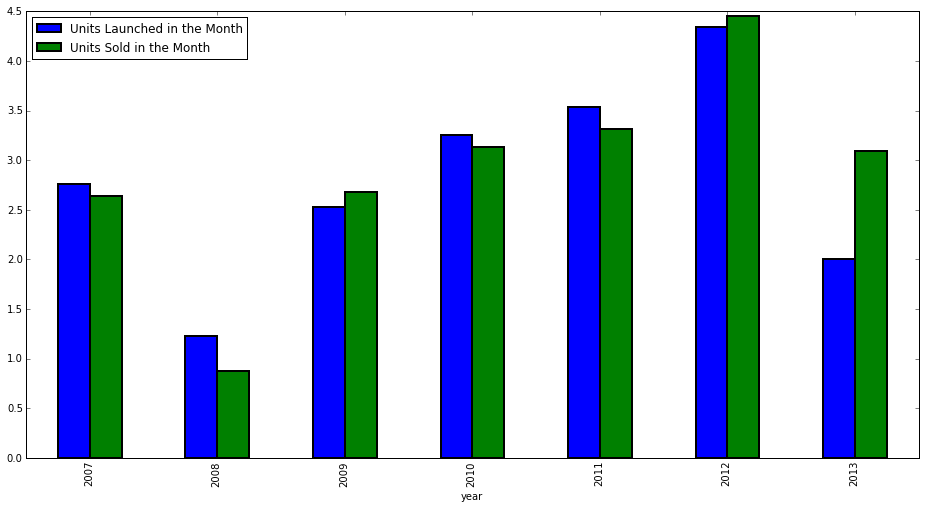

In [108]:
df_agg = df.set_index(mi)
df_agg.sortlevel(0).groupby(level=0).mean()[df_agg.columns[4:6]].plot(figsize=(16,8), 
                            kind='bar', linewidth=2)

### Monthly distribution

#### Over the years, the month of July seems to be very active, with honorable mentioned to March and April.
#### Winters (months 10,11,12 and 1) seems to less popular in the real estate market

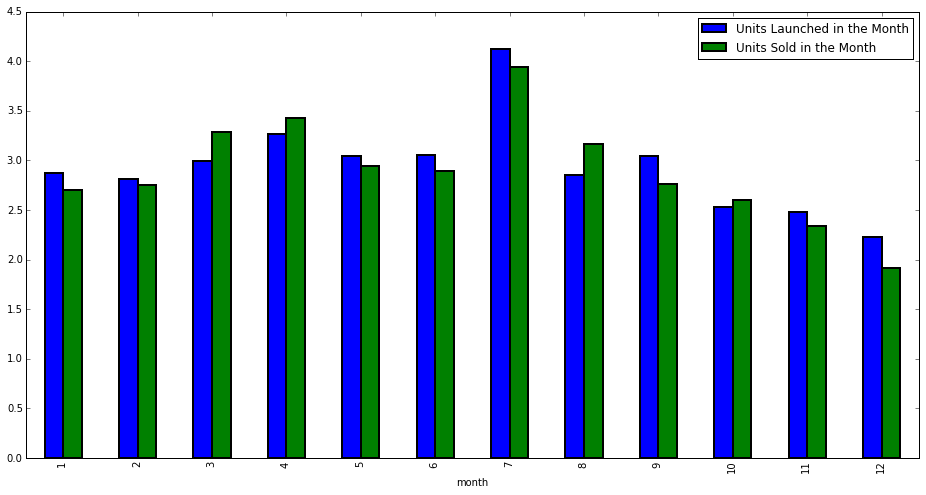

In [124]:
df_agg.sortlevel(0).swaplevel(0,1).groupby(level=0).mean()[df_agg.columns[4:6]].plot(figsize=(16,8), 
                            kind='bar', linewidth=2)

# Year wise price distribution

## from 2007 to 2008, there was a severe drop in prices

We see that from 2007 to 2008, there was a severe drop in prices, and this continued for a bit upto 2009.. If we related this to 2008's global financial crisis, it makes sense that the prices would've dropped.

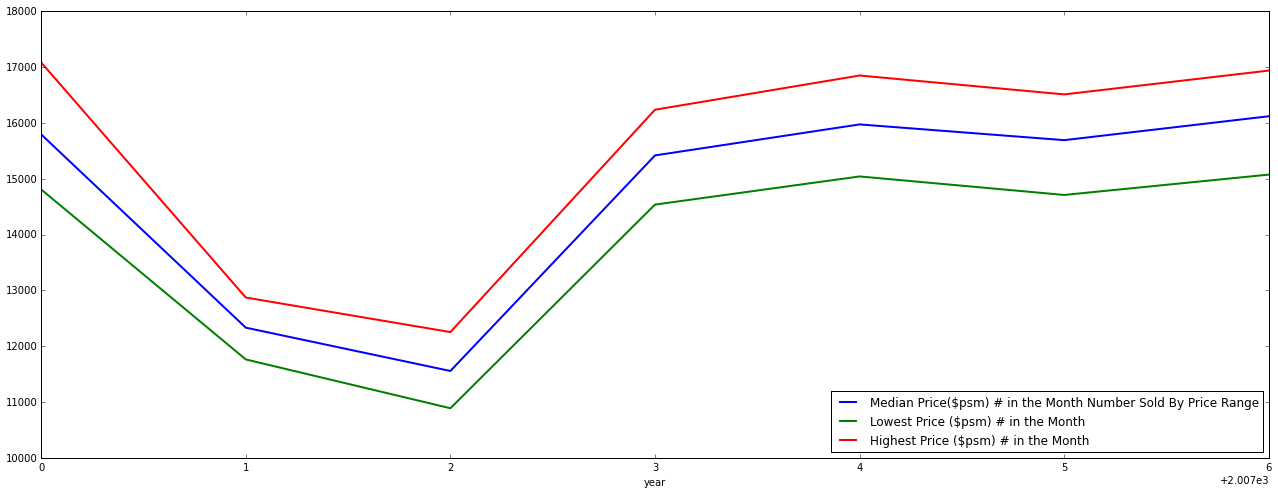

In [115]:
df_agg.sortlevel(0).groupby(level=0).mean()[df_agg.columns[-3:]].plot(figsize=(22,8), 
                             linewidth=2)

## This could also be seen in the number of units sold in the around 2008.

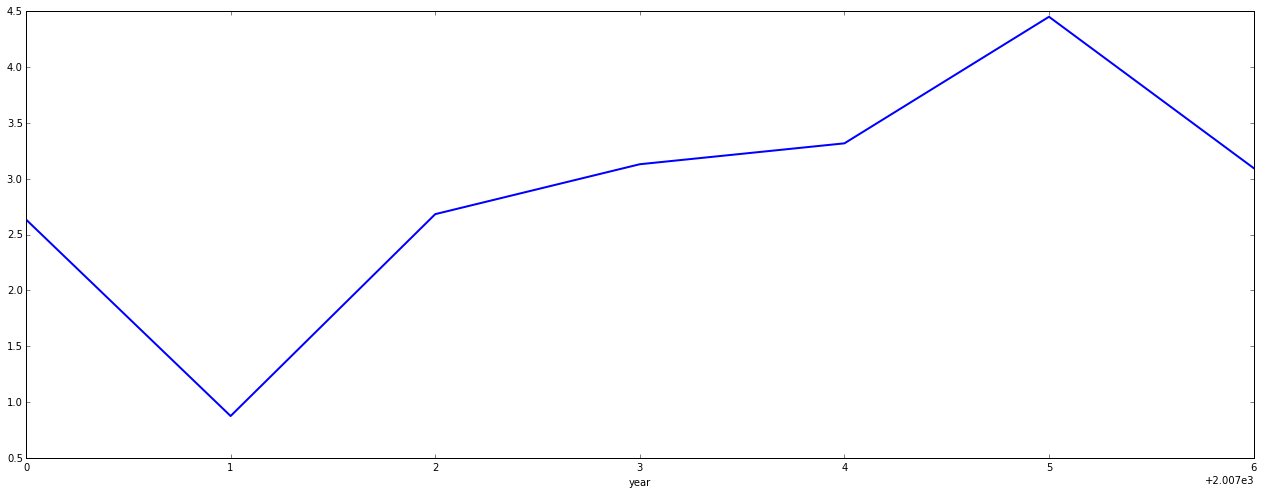

In [118]:
df_agg.sortlevel(0).groupby(level=0).mean()['Units Sold in the Month'].plot(figsize=(22,8),
                             linewidth=2)

## More graphs

### Mean of 'Units Sold in the Month' over the years (2007-2013)

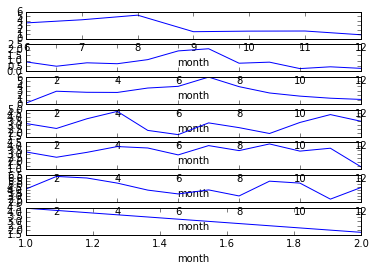

In [122]:
# df.set_index(mi).xs(2007, level='year', drop_level=True)
df_agg = df.set_index(mi).sortlevel([0,1]).groupby(level=[0,1]).mean()
years = df_agg.index.get_level_values(0).unique()
f, a = plt.subplots(len(years),1)

for i in xrange(len(years)):
    df_agg['Units Sold in the Month'].xs(years[i]).plot(ax=a[i])
# df_agg['Units Sold in the Month']

# Other Statistics (FAQs, per se)

### Developer stats

1. Developers with highest cumulative units launched to-date
2. Developers with consistently high solds

### Street stats
1. High-range selling streets
2. Budget streets
3. Low-range streets

### Project highlights
1. Projects with highest number of units launched and sold
2. Projects with most number of streets associated (determine project size)

### Locality

### Property Type

In [120]:
# df_agg = df.set_index(mi).xs(2007, level='year', drop_level=True)
# top_streets = df_agg.groupby(level=4).sum()\
#     .sort_values('Median Price($psm) # in the Month Number Sold By Price Range', 
#                  ascending=False).index[:10]
# df_agg = df_agg.iloc[df_agg.index.get_level_values('Street Name').isin(top_streets)]
# df_agg = df_agg.sortlevel(0)\
#     ['Median Price($psm) # in the Month Number Sold By Price Range']\
#     .dropna() #.swaplevel(0,-2).swaplevel(1,-1)\
# df_agg = df_agg.reset_index(level=[0,1,2,3], drop=True)